In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# spectral analysis
from scipy import signal
from scipy.signal import periodogram as periodogram_f
from scipy.fft import fftfreq, fftshift
from scipy.fft import fft, ifft, fft2, ifft2

In [2]:
# with pandas 2.0, one could use date_format='%Y-%m-%d %H:%M:%S%z', but that's not yet available on Arch Linux
solar_ts=pd.read_csv("data/energy_charts.csv", sep=",", header=0)#date_format='%Y-%m-%d %H:%M:%S%z')#parse_dates={"date": ["Datum"]})

In [ ]:
print(solar_ts['Datum'])

In [3]:
print(solar_ts['Datum'])

0         2015-01-01T00:00+01:00
1         2015-01-01T00:15+01:00
2         2015-01-01T00:30+01:00
3         2015-01-01T00:45+01:00
4         2015-01-01T01:00+01:00
                   ...          
327589    2024-05-05T10:15+02:00
327590    2024-05-05T10:30+02:00
327591    2024-05-05T10:45+02:00
327592    2024-05-05T11:00+02:00
327593    2024-05-05T11:15+02:00
Name: Datum, Length: 327594, dtype: object


<Axes: xlabel='Datum'>

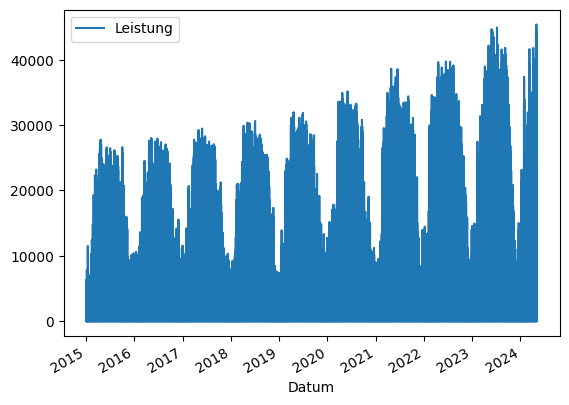

In [4]:
solar_ts['Datum']=pd.to_datetime(solar_ts['Datum'], format='%Y-%m-%dT%H:%M%z', utc=True)
solar_ts=solar_ts.set_index(keys="Datum",drop=True)
solar_ts.plot()

In [5]:
adfresult = adfuller(solar_ts[2:30000])
print(adfresult[0])
print(adfresult[1])

-22.4459509440449
0.0


<Axes: xlabel='Datum'>

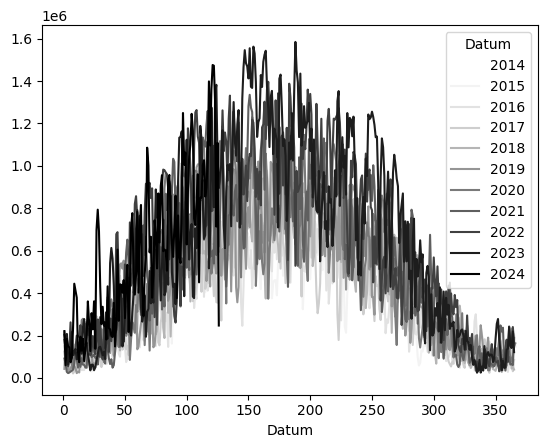

In [6]:
# see https://stackoverflow.com/questions/30379789/plot-pandas-data-frame-with-year-over-year-data
pv = pd.pivot_table(solar_ts, index=solar_ts.index.dayofyear, columns=solar_ts.index.year,
                    values='Leistung', aggfunc='sum')
pv.plot(cmap="Grays")

<Axes: xlabel='Datum'>

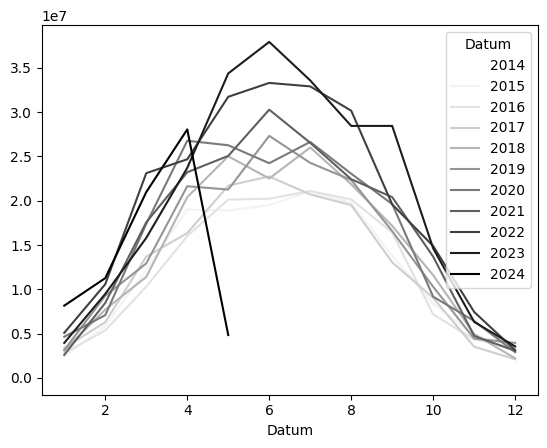

In [7]:
# see https://stackoverflow.com/questions/30379789/plot-pandas-data-frame-with-year-over-year-data
pv = pd.pivot_table(solar_ts, index=solar_ts.index.month, columns=solar_ts.index.year,
                    values='Leistung', aggfunc='sum')
pv.plot(cmap="Grays")

In [8]:
# An example of a gap in the data
# TODO: Also, there is duplicate data here that pandas duplicated-function will not find...?
solar_ts.index[5660:5680]

DatetimeIndex(['2015-02-28 22:00:00+00:00', '2015-02-28 22:15:00+00:00',
               '2015-02-28 22:30:00+00:00', '2015-02-28 22:45:00+00:00',
               '2015-03-01 00:00:00+00:00', '2015-03-01 00:15:00+00:00',
               '2015-03-01 00:30:00+00:00', '2015-03-01 00:45:00+00:00',
               '2015-03-01 00:00:00+00:00', '2015-03-01 00:15:00+00:00',
               '2015-03-01 00:30:00+00:00', '2015-03-01 00:45:00+00:00',
               '2015-03-01 01:00:00+00:00', '2015-03-01 01:15:00+00:00',
               '2015-03-01 01:30:00+00:00', '2015-03-01 01:45:00+00:00',
               '2015-03-01 02:00:00+00:00', '2015-03-01 02:15:00+00:00',
               '2015-03-01 02:30:00+00:00', '2015-03-01 02:45:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Datum', freq=None)

In [9]:
pd.Series(solar_ts.index.duplicated()).value_counts()

False    327522
True         72
Name: count, dtype: int64

In [10]:
(pd.Series(solar_ts.index[5660:5680]).diff())

0                  NaT
1      0 days 00:15:00
2      0 days 00:15:00
3      0 days 00:15:00
4      0 days 01:15:00
5      0 days 00:15:00
6      0 days 00:15:00
7      0 days 00:15:00
8    -1 days +23:15:00
9      0 days 00:15:00
10     0 days 00:15:00
11     0 days 00:15:00
12     0 days 00:15:00
13     0 days 00:15:00
14     0 days 00:15:00
15     0 days 00:15:00
16     0 days 00:15:00
17     0 days 00:15:00
18     0 days 00:15:00
19     0 days 00:15:00
Name: Datum, dtype: timedelta64[ns]

In [11]:
# Those values need imputation!
pd.date_range(solar_ts.index.min(), solar_ts.index.max(), freq='15Min').difference(solar_ts.index)

DatetimeIndex(['2015-02-28 23:00:00+00:00', '2015-02-28 23:15:00+00:00',
               '2015-02-28 23:30:00+00:00', '2015-02-28 23:45:00+00:00',
               '2015-09-25 02:00:00+00:00', '2015-09-25 02:15:00+00:00',
               '2015-09-25 02:30:00+00:00', '2015-09-25 02:45:00+00:00',
               '2016-02-27 02:00:00+00:00', '2016-02-27 02:15:00+00:00',
               '2016-02-27 02:30:00+00:00', '2016-02-27 02:45:00+00:00',
               '2016-09-30 02:00:00+00:00', '2016-09-30 02:15:00+00:00',
               '2016-09-30 02:30:00+00:00', '2016-09-30 02:45:00+00:00',
               '2017-02-26 02:00:00+00:00', '2017-02-26 02:15:00+00:00',
               '2017-02-26 02:30:00+00:00', '2017-02-26 02:45:00+00:00',
               '2017-09-29 02:00:00+00:00', '2017-09-29 02:15:00+00:00',
               '2017-09-29 02:30:00+00:00', '2017-09-29 02:45:00+00:00',
               '2018-02-25 02:00:00+00:00', '2018-02-25 02:15:00+00:00',
               '2018-02-25 02:30:00+00:00', '2018-0

In [12]:
# This add NaN as value for the missing indices, we can impute this later.
solar_ts = solar_ts.resample("15Min").first()
# As only a few values need imputation, so the choice of the imputation algorithm does not matter much.
solar_ts = solar_ts.interpolate(method="time")
# Only now can we infer a frequency.
solar_ts=solar_ts.asfreq(pd.infer_freq(solar_ts.index))

In [13]:
# There are no duplicated dates, good!
# (Although, a bit questionable, see above)
np.count_nonzero(solar_ts.index.duplicated())

0

In [14]:
solar_ts=solar_ts.asfreq(pd.infer_freq(solar_ts.index))

<Axes: xlabel='Datum'>

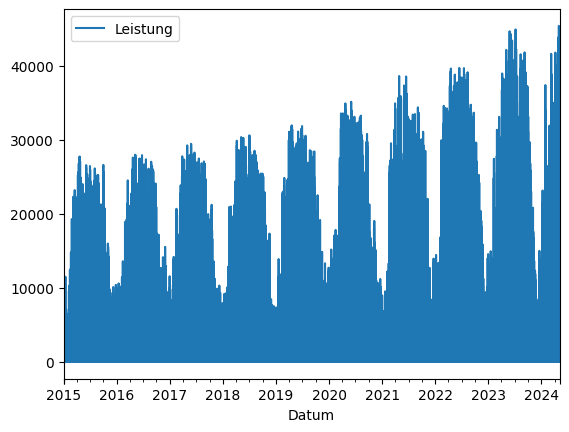

In [15]:
solar_ts.plot()

In [16]:
solar_ts_series = solar_ts.Leistung

<Axes: xlabel='Datum'>

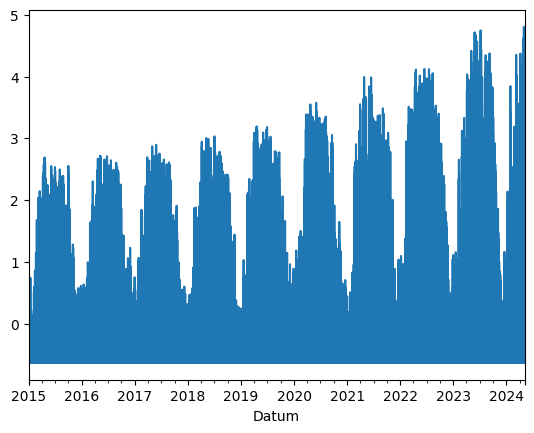

In [17]:
# Normalize
avg, dev = solar_ts_series.mean(), solar_ts_series.std()
solar_ts_series = (solar_ts_series - avg)/dev
solar_ts_series.plot()

<Axes: xlabel='Datum'>

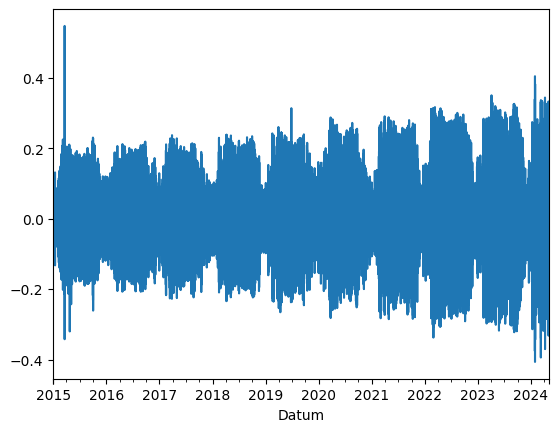

In [18]:
# Remove trend (TODO: compare with the approach in the Fourier series video, where they also detrend?)
solar_ts_series = solar_ts_series.diff().dropna()
solar_ts_series.plot()

In [19]:
# Consider taking another difference: solar_ts_series = solar_ts_series.diff().dropna()
# solar_ts_series.plot()

In [20]:
# remove increasing volatility - or (TODO: use a (G)ARCH here).
annual_volatility = solar_ts_series.groupby(solar_ts_series.index.year).std()
annual_vol_per_day = solar_ts_series.index.map(lambda d: annual_volatility.loc[d.year])
solar_ts_series_corrected_variance = solar_ts_series/annual_vol_per_day

In [21]:
annual_volatility

Datum
2014    0.000000
2015    0.059382
2016    0.058232
2017    0.060318
2018    0.068400
2019    0.070074
2020    0.076130
2021    0.078294
2022    0.092524
2023    0.094256
2024    0.096496
Name: Leistung, dtype: float64

In [22]:
annual_vol_per_day

Index([                 0.0,                  0.0,                  0.0,
       0.059382013550229464, 0.059382013550229464, 0.059382013550229464,
       0.059382013550229464, 0.059382013550229464, 0.059382013550229464,
       0.059382013550229464,
       ...
        0.09649560072446868,  0.09649560072446868,  0.09649560072446868,
        0.09649560072446868,  0.09649560072446868,  0.09649560072446868,
        0.09649560072446868,  0.09649560072446868,  0.09649560072446868,
        0.09649560072446868],
      dtype='float64', name='Datum', length=327593)

<Axes: xlabel='Datum'>

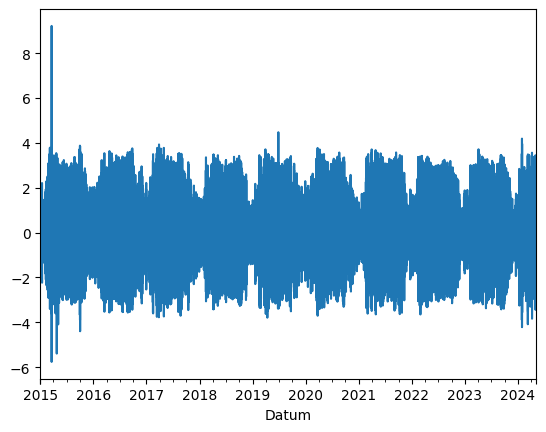

In [23]:
solar_ts_series_corrected_variance.plot()

In [24]:
# ritvik takes monthly means here
# why not take dayofyear?
monthly_mean = solar_ts_series_corrected_variance.groupby(solar_ts_series_corrected_variance.index.month).mean()
monthly_mean_per_day = solar_ts_series_corrected_variance.index.map(lambda d: monthly_mean.loc[d.month])

In [25]:
solar_ts_series_corrected_variance= solar_ts_series_corrected_variance - monthly_mean_per_day

<Axes: xlabel='Datum'>

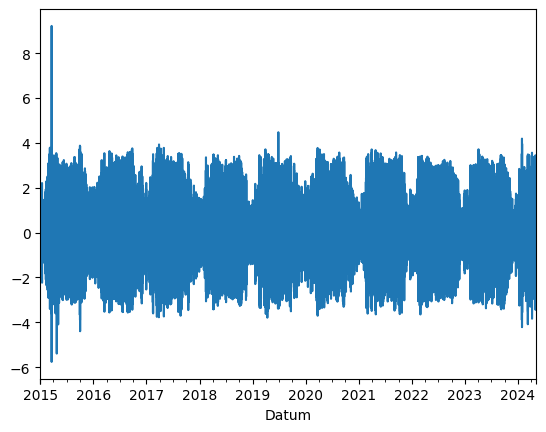

In [26]:
solar_ts_series_corrected_variance.plot()

In [27]:
# we only take the first few samples as my RAM explodes otherwise
adfresult = adfuller(solar_ts_series_corrected_variance[3:30000])
print(adfresult[0])
print(adfresult[1])
adfresult = adfuller(solar_ts_series_corrected_variance[120000:150000])
print(adfresult[0])
print(adfresult[1])

-45.67468183971968
0.0
-43.56622851187169
0.0
